C:\Users\zkhan\AppData\Local\Temp\ipykernel_28372\2406987759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Month'] = accidents['EventDate'].dt.month
C:\Users\zkhan\AppData\Local\Temp\ipykernel_28372\2406987759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['Month'] = accidents['EventDate'].dt.month


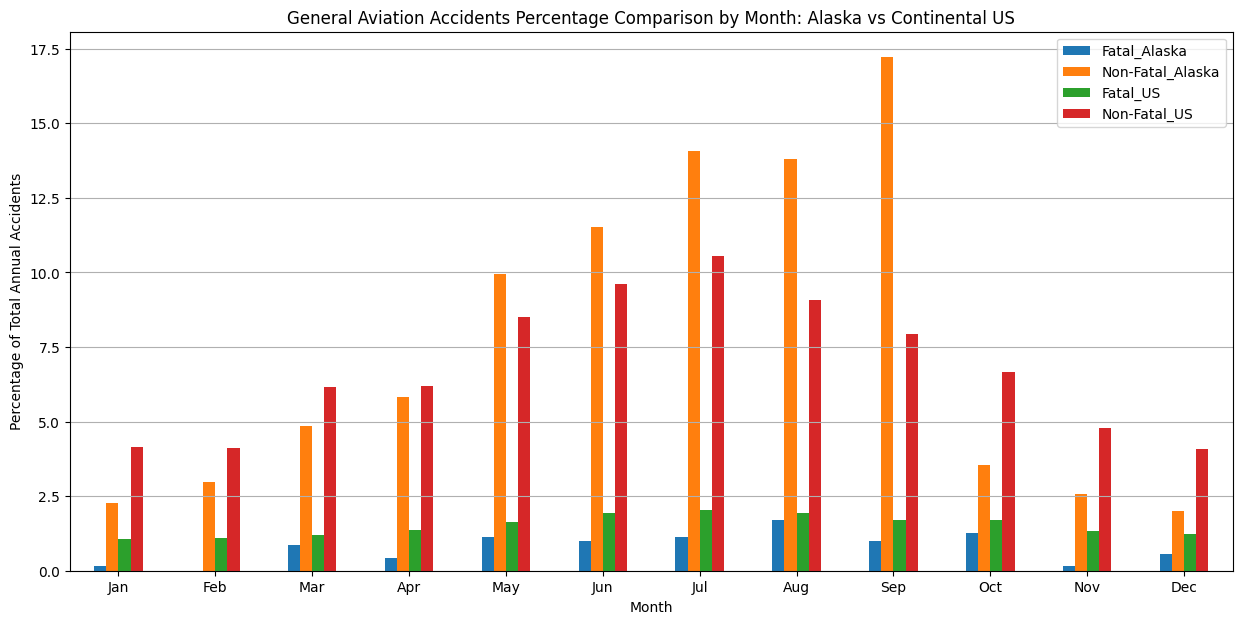

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'  # Replace with the path to your file
accidents_df = pd.read_excel(file_path, sheet_name='Accidents')

accidents_df = accidents_df[(accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0)] #* Filter by fatal or serious injuries only

# Function to calculate percentages relative to the total annual accidents
def calculate_annual_percentages(accidents):
    accidents['Month'] = accidents['EventDate'].dt.month
    annual_total = len(accidents)
    monthly_injury = accidents.groupby(['Month', 'InjuryLevel']).size().unstack(fill_value=0)
    return (monthly_injury.divide(annual_total, axis=0) * 100)

# Filter and calculate percentages for Alaska
alaska_accidents = accidents_df[accidents_df['StateOrRegion'] == 'Alaska']
alaska_annual_percentages = calculate_annual_percentages(alaska_accidents)

# Filter and calculate percentages for the Continental US
continental_us_accidents = accidents_df[
    (accidents_df['Country'] == 'United States') & 
    (accidents_df['StateOrRegion'] != 'Alaska') & 
    (accidents_df['StateOrRegion'] != 'Hawaii')
]
continental_us_annual_percentages = calculate_annual_percentages(continental_us_accidents)

# Merge the two datasets for side-by-side comparison
merged_percentages = pd.concat([alaska_annual_percentages.add_suffix('_Alaska'), continental_us_annual_percentages.add_suffix('_US')], axis=1)

# Plotting the grouped bar chart
merged_percentages.plot(kind='bar', figsize=(15, 7))

plt.title('General Aviation Accidents With Serious or Fatal Injuries Percentage Comparison by Month: Alaska vs Continental US')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Annual Accidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()
